<a href="https://colab.research.google.com/github/nicopispe86/Data_Science1_-ML_Proyecto_Coderhouse_Nico/blob/main/Proyecto_Water_quality_ParteI_Pis_Perez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Abstract

El acceso a agua potable segura es un tema central para la salud y el desarrollo de cualquier comunidad. Contar con sistemas capaces de evaluar la calidad del agua puede ayudar a tomar decisiones más rápidas y eficientes, sobre todo en lugares donde no se dispone de análisis físicos constantes. En este proyecto se utiliza el dataset Water Potability, que reúne 3.276 muestras de distintos cuerpos de agua, cada una con mediciones fisicoquímicas y una etiqueta que indica si esa muestra es potable (1) o no potable (0). El objetivo principal es desarrollar un modelo de machine learning que permita predecir la potabilidad del agua a partir de estas variables.

El conjunto de datos incluye características relevantes para la calidad del agua, como el pH, la dureza, los sólidos disueltos totales, los niveles de cloraminas, sulfatos, conductividad, carbono orgánico, trihalometanos y turbidez. Muchas de estas variables están asociadas a estándares internacionales, como los valores recomendados por la Organización Mundial de la Salud, lo que hace que el dataset sea una buena representación de parámetros reales utilizados para evaluar agua de consumo. Por ejemplo, el pH suele considerarse aceptable entre 6.5 y 8.5, la conductividad no debería superar los 400 μS/cm y ciertas sustancias como los trihalometanos o las cloraminas tienen límites específicos para ser consideradas seguras.

A lo largo del proyecto se realiza un análisis exploratorio para entender la distribución de los datos, detectar valores faltantes y evaluar si existe relación entre las variables y la potabilidad. Después se prueban distintos modelos de clasificación, comenzando con un Random Forest básico y luego incorporando técnicas para tratar el desbalance entre muestras potables y no potables, ya que el dataset contiene más casos de agua no apta que apta para consumo humano. La técnica SMOTE, utilizada para generar ejemplos sintéticos de la clase minoritaria, permite mejorar significativamente el desempeño del modelo. El mejor resultado alcanza alrededor de un 72 por ciento de accuracy, con valores equilibrados de precisión y recall para la clase potable.

En conclusión, el proyecto muestra que es posible construir un modelo predictivo razonablemente efectivo utilizando solo mediciones químicas del agua. Además, confirma que tratar el desbalance de clases es clave para mejorar la detección de agua apta para consumo, lo que abre la puerta a futuros desarrollos que puedan contribuir a evaluaciones más accesibles y automatizadas de la calidad del agua.

## Preguntas de investigación

1. ¿Es posible predecir si una muestra de agua es potable utilizando únicamente variables fisicoquímicas?
2. ¿Qué variables del dataset parecen tener mayor relación con la potabilidad?
3. ¿Existen diferencias claras en la distribución de las variables entre agua potable y no potable?
4. ¿Cómo afecta el desbalance entre muestras potables y no potables al rendimiento del modelo?
5. ¿La combinación de varias variables mejora la capacidad de predicción frente al análisis individual de cada una?



## Hipótesis

1. La potabilidad del agua no depende de una sola variable, sino de la combinación de múltiples parámetros fisicoquímicos.
2. Los modelos basados en árboles, como Random Forest, pueden capturar mejor las relaciones no lineales del dataset que modelos lineales tradicionales.
3. El desbalance de clases afecta negativamente la detección de agua potable, y técnicas de balanceo como SMOTE deberían mejorar el recall de la clase potable.
4. Variables como pH, sulfatos, dureza y sólidos disueltos tendrán mayor influencia en la predicción en comparación con otras del dataset.


## Importación de librerías

Para comenzar el análisis exploratorio del dataset, se importan las librerías principales que se utilizarán en el proyecto. Pandas permitirá cargar y manipular los datos en formato tabular, mientras que NumPy servirá de apoyo en operaciones numéricas.
Además de Pandas y NumPy, se importan Matplotlib y Seaborn para realizar visualizaciones durante el análisis exploratorio. Estas librerías permiten graficar distribuciones, relaciones entre variables y patrones que pueden ayudar a entender mejor el dataset.

In [ ]:
# 1. Importar librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URL "Raw" del archivo en GitHub
url = "https://raw.githubusercontent.com/nicopispe86/Data_Science1_-ML_Proyecto_Coderhouse_Nico/refs/heads/main/water_potability.csv"

# Lee el CSV y lo guarda en un DataFrame llamado df
df = pd.read_csv(url)

# Muestra las primeras 5 filas
df.head()



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Exploración inicial del dataset

A continuación se analiza la estructura del dataset para conocer la cantidad de datos, tipos de variables y la presencia de valores faltantes. Esto ayuda a definir los primeros pasos de limpieza y preprocesamiento.

- df.info() Muestra cuántas filas y columnas hay, qué tipo de datos tiene cada variable y si faltan datos en alguna columna.

In [ ]:
# Ver estructura general del dataset:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Revisión general del dataset

Antes de avanzar con el análisis, se revisa el estado de los datos desde tres ángulos:

1. **Valores faltantes:** para identificar en qué columnas hay datos incompletos y cuánto afecta eso al dataset.
2. **Estadísticas básicas:** para observar rangos, promedios y posibles valores extremos en las variables numéricas.
3. **Muestras aleatorias:** para ver ejemplos reales de filas y verificar que los valores tengan sentido.

Este paso permite detectar problemas como datos incompletos, outliers o comportamientos inusuales que puedan influir en el análisis posterior.


In [ ]:
# Valores faltantes por columna
print("=== Valores faltantes por columna ===")
print(df.isna().sum())
print("\n")  # salto de línea

# Estadísticas descriptivas
print("=== Estadísticas descriptivas ===")
print(df.describe().round(2))
print("\n")  # salto de línea

# Muestra aleatoria de 5 filas
print("=== Muestra aleatoria de 5 filas ===")
print(df.sample(5, random_state=42).round(2))



=== Valores faltantes por columna ===
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


=== Estadísticas descriptivas ===
            ph  Hardness    Solids  Chloramines  Sulfate  Conductivity  \
count  2785.00   3276.00   3276.00      3276.00  2495.00       3276.00   
mean      7.08    196.37  22014.09         7.12   333.78        426.21   
std       1.59     32.88   8768.57         1.58    41.42         80.82   
min       0.00     47.43    320.94         0.35   129.00        181.48   
25%       6.09    176.85  15666.69         6.13   307.70        365.73   
50%       7.04    196.97  20927.83         7.13   333.07        421.88   
75%       8.06    216.67  27332.76         8.11   359.95        481.79   
max      14.00    323.12  61227.20        13.13   481.03        753.34   

       Organic_c

## Interpretación de los resultados

Los valores faltantes (Nan) muestran que algunas columnas, especialmente **ph** y **Sulfate**, no tienen datos completos, por lo que será necesario aplicar algún método de limpieza o imputación antes de continuar.
Las estadísticas descriptivas indican que las variables numéricas presentan rangos muy amplios entre sus valores mínimos y máximos, lo que sugiere la presencia de posibles valores extremos (outliers) y una alta variabilidad en las muestras.
Además, la muestra aleatoria confirma que no existe una relación evidente entre una sola variable y la potabilidad del agua, ya que valores similares pueden corresponder tanto a muestras potables como no potables. En conjunto, estos resultados muest


## Distribución de la variable objetivo (Potability)

En este paso se analiza cuántas muestras corresponden a agua potable (1) y cuántas a agua no potable (0). Esto permite identificar si las clases están balanceadas o si una aparece con mucha mayor frecuencia que la otra. Detectar desbalance es importante porque puede afectar el desempeño de los modelos de clasificación, ya que un modelo podría inclinarse a predecir siempre la clase mayoritaria y obtener un buen accuracy, pero sin realmente aprender a distinguir entre ambas clases.


In [ ]:
df["Potability"].value_counts(), df["Potability"].value_counts(normalize=True) # Distribución del target (Potability)


(Potability
 0    1998
 1    1278
 Name: count, dtype: int64,
 Potability
 0    0.60989
 1    0.39011
 Name: proportion, dtype: float64)

Los resultados muestran que el 60,99% de las muestras corresponden a agua no potable (clase 0), mientras que solo el 39,01% corresponde a agua potable (clase 1). Esto indica que el dataset está desbalanceado, ya que hay una mayor cantidad de muestras de agua no potable.
Por eso, más adelante será importante considerar técnicas como balanceo de clases o ajustes en el modelo para evitar sesgos.


## Distribución de las variables numéricas

Se grafican histogramas para observar la forma de las distribuciones de las variables numéricas. Esto permite identificar si los datos están concentrados en ciertos rangos, si existen valores extremos (outliers) y si alguna variable presenta una distribución muy sesgada, lo cual puede influir en los pasos posteriores de preprocesamiento y modelado.


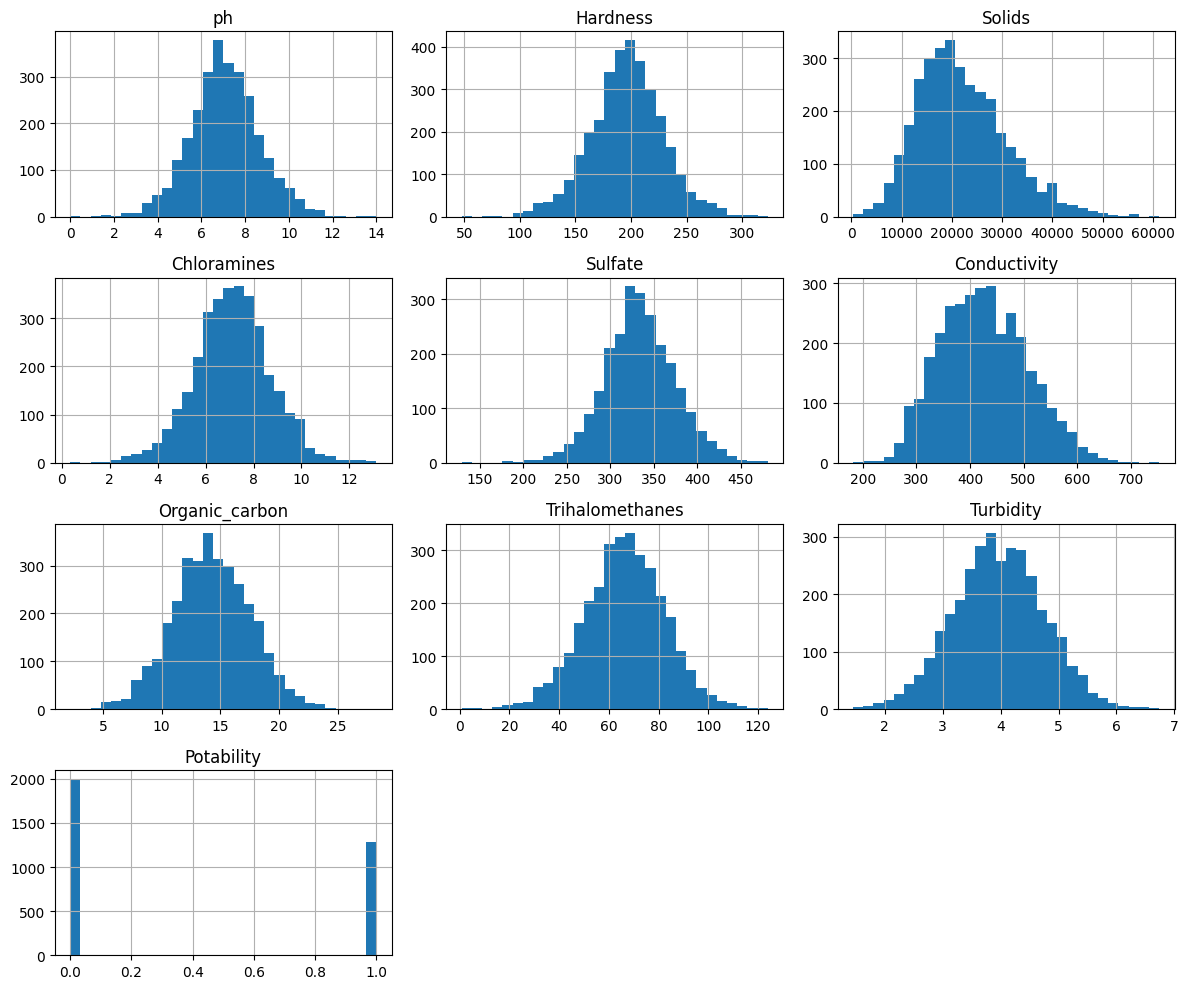

In [ ]:
# Histogramas de las variables numéricas
df.hist(figsize=(12,10), bins=30)
plt.tight_layout()
plt.show()

Los histogramas muestran que la mayoría de las variables numéricas tienen distribuciones similares a una forma de campana, con valores concentrados en rangos centrales y pocos valores extremos. Sin embargo, algunas variables como Solids y Conductivity presentan colas más largas hacia la derecha, lo que sugiere la presencia de valores atípicos (outliers). También se observa que las variables no comparten la misma escala, ya que algunas alcanzan valores muy altos mientras que otras se mantienen en rangos bajos. Por último, el histograma de Potability confirma visualmente el desbalance entre clases, con una mayor cantidad de muestras de agua no potable.


## Mapa de calor de correlación (Heatmap)

Se analiza la correlación entre las variables numéricas del dataset para identificar qué tan relacionadas están entre sí. Esto permite detectar posibles redundancias, relaciones fuertes o variables que podrían no aportar información relevante. También ayuda a observar si existe alguna relación directa entre las características medidas y la potabilidad del agua.


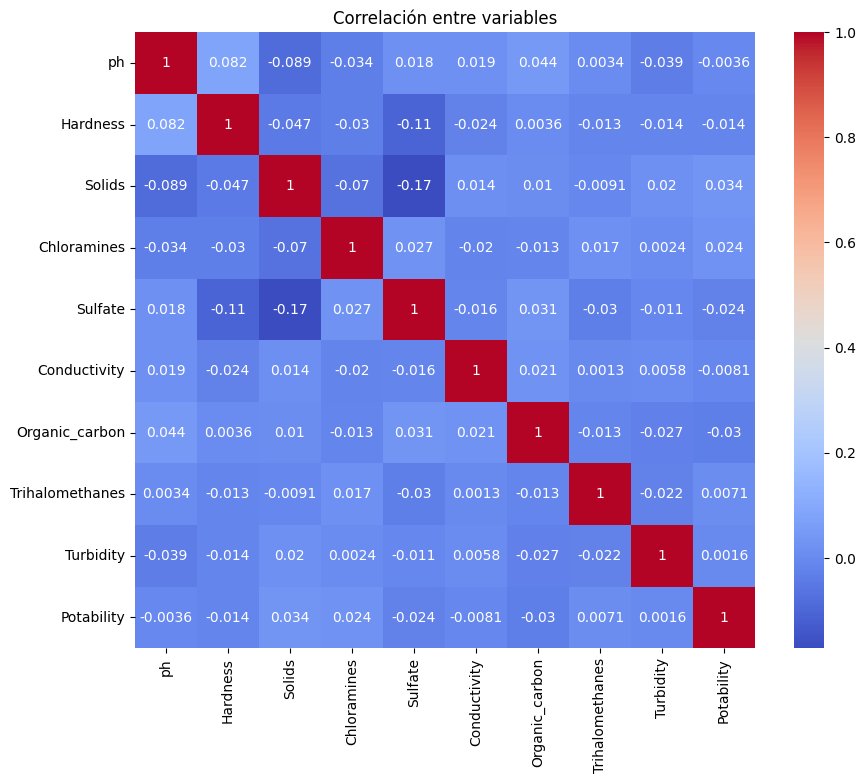

In [ ]:
# Mapa de calor de correlación
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlación entre variables")
plt.show()

### Interpretación del mapa de correlación

El heatmap muestra que la mayoría de las variables del dataset presentan correlaciones muy bajas entre sí, con valores cercanos a cero. Esto indica que no existe una relación lineal fuerte entre las características medidas del agua. Además, la variable objetivo (Potability) también presenta correlaciones casi nulas con el resto de las variables, lo que sugiere que ninguna de ellas, por sí sola, permite determinar si el agua es potable o no. En consecuencia, la potabilidad parece depender de la combinación de múltiples factores, lo que refuerza la necesidad de utilizar modelos de machine learning que consideren varias variables simultáneamente.


## Correlación de cada variable con la potabilidad

Para entender qué variables podrían estar más relacionadas con la potabilidad del agua, se calcula la correlación individual de cada característica numérica respecto a la variable objetivo (Potability). Aunque las correlaciones son bajas, este análisis permite identificar cuáles variables podrían aportar más información al modelo y cuáles tienen una relación casi nula.

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64


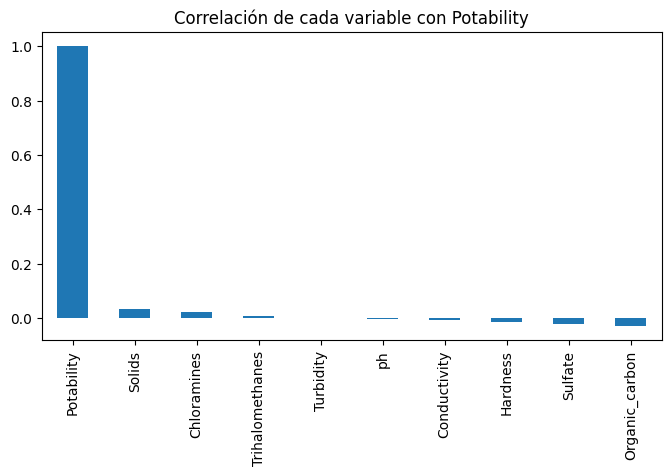

In [ ]:
# Correlación de cada variable con Potability
cor_pot = df.corr()['Potability'].sort_values(ascending=False)
print(cor_pot)

# Gráfico de barras
plt.figure(figsize=(8,4))
cor_pot.plot(kind='bar', title="Correlación de cada variable con Potability")
plt.show()


### Interpretación de la correlación con Potability

Los valores de correlación entre cada variable numérica y la potabilidad del agua resultaron muy cercanos a cero. Esto indica que no existe una relación lineal fuerte entre ninguna característica individual y el hecho de que el agua sea potable o no. En otras palabras, ninguna variable por sí sola permite determinar la potabilidad. Esto sugiere que la predicción de potabilidad depende de la combinación de múltiples factores, lo que refuerza la necesidad de utilizar modelos de machine learning que analicen varias variables en conjunto.


## Distribución de las variables según Potability

Aunque la correlación entre las variables y la potabilidad del agua fue muy baja, eso no significa que ambas clases (0 = no potable, 1 = potable) se comporten exactamente igual. Para explorar posibles diferencias, se analizan las distribuciones de las variables separadas por la variable objetivo (Potability).

Este tipo de visualización permite detectar si alguna característica tiende a tomar valores más altos o más bajos dependiendo de si el agua es potable o no. Si bien estas diferencias pueden no ser suficientes para predecir por sí solas la potabilidad, ayudan a entender el comportamiento del dataset y pueden aportar información útil para futuros modelos.


/tmp/ipython-input-723386760.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Potability', y=var, data=df, palette='Set2')


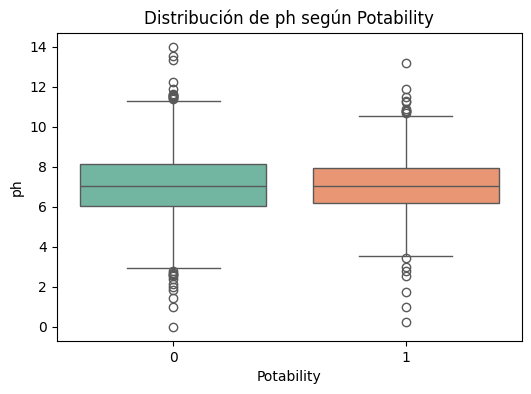

/tmp/ipython-input-723386760.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Potability', y=var, data=df, palette='Set2')


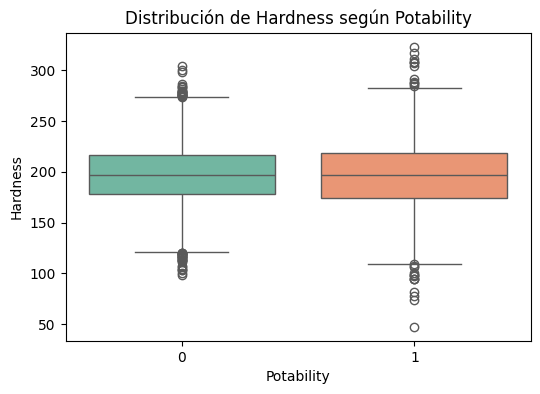

/tmp/ipython-input-723386760.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Potability', y=var, data=df, palette='Set2')


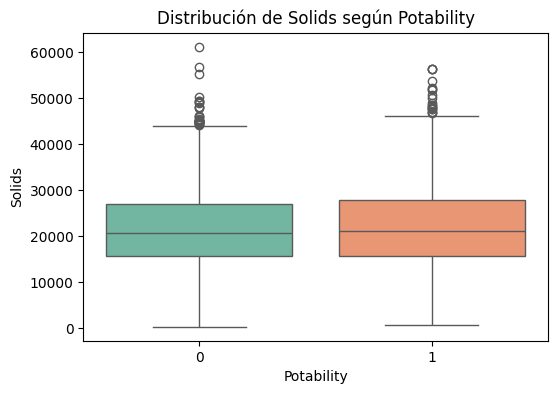

/tmp/ipython-input-723386760.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Potability', y=var, data=df, palette='Set2')


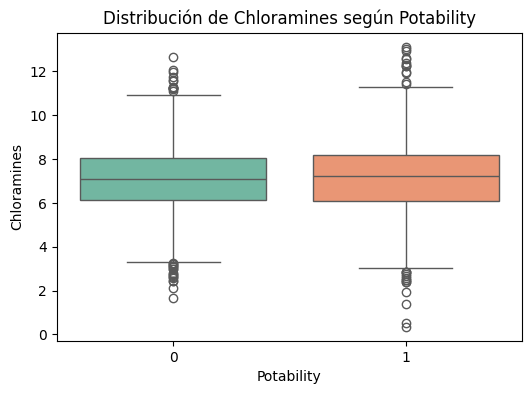

/tmp/ipython-input-723386760.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Potability', y=var, data=df, palette='Set2')


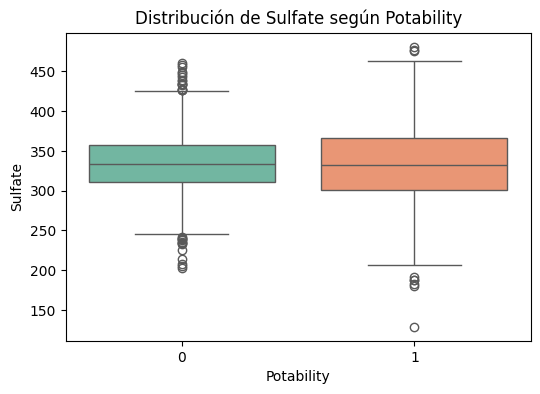

/tmp/ipython-input-723386760.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Potability', y=var, data=df, palette='Set2')


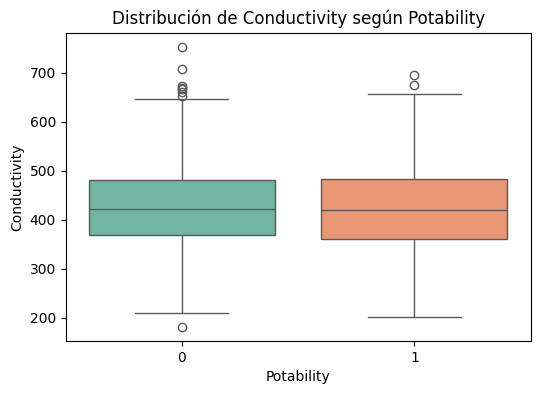

/tmp/ipython-input-723386760.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Potability', y=var, data=df, palette='Set2')


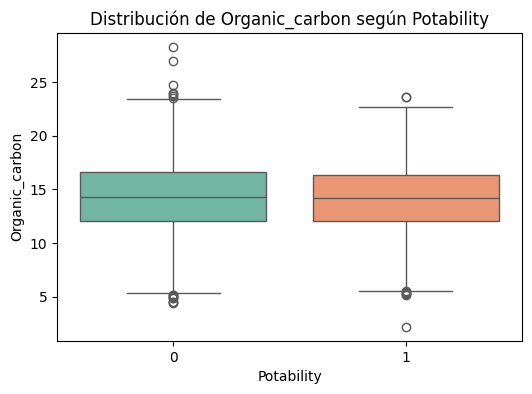

/tmp/ipython-input-723386760.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Potability', y=var, data=df, palette='Set2')


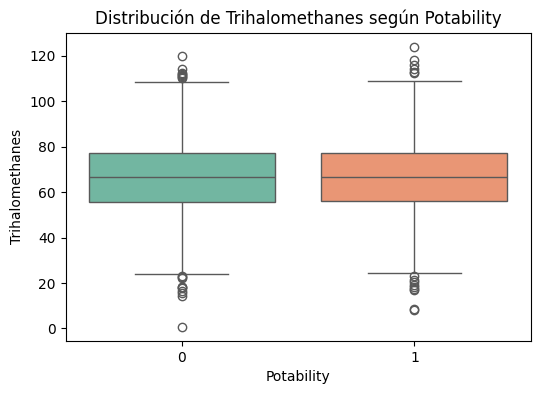

/tmp/ipython-input-723386760.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Potability', y=var, data=df, palette='Set2')


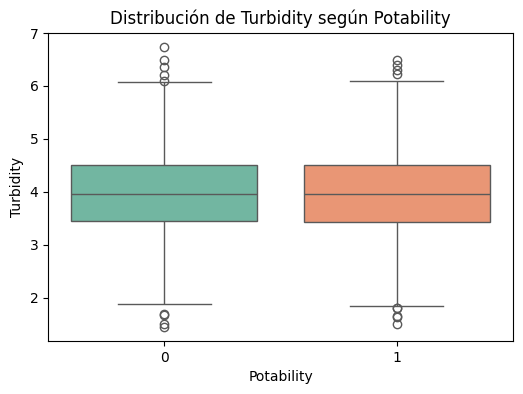

In [ ]:
# Boxplots de cada variable según Potability

variables = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
             'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

for var in variables:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Potability', y=var, data=df, palette='Set2')
    plt.title(f'Distribución de {var} según Potability')
    plt.show()

### Conclusión del análisis de boxplots

Los boxplots muestran que las distribuciones de todas las variables físico-químicas son muy similares entre agua potable (Potability = 1) y no potable (Potability = 0).
Las medianas y los rangos de cada característica se superponen casi por completo, lo que indica que ninguna variable individual permite diferenciar claramente entre ambas clases.
Además, la presencia de alta variabilidad y valores atípicos en varias columnas refuerza la idea de que la potabilidad del agua no depende de un único parámetro, sino de la combinación de múltiples factores.
Este resultado coincide con lo observado en la correlación y sugiere que será necesario utilizar modelos de machine learning que consideren todas las variables en conjunto.


##Análisis multivariado (Scatterplot multivariado)

Hasta este punto, se analizaron las variables de forma individual (univariado) y también comparándolas con la potabilidad del agua (bivariado). Sin embargo, ninguna variable por sí sola mostró una separación clara entre agua potable y no potable. Por ese motivo, resulta útil observar cómo se comportan varias características en conjunto.

El siguiente gráfico multivariado permite visualizar simultáneamente tres variables fisicoquímicas del agua, con el objetivo de detectar patrones más complejos que puedan aportar información adicional sobre la potabilidad.

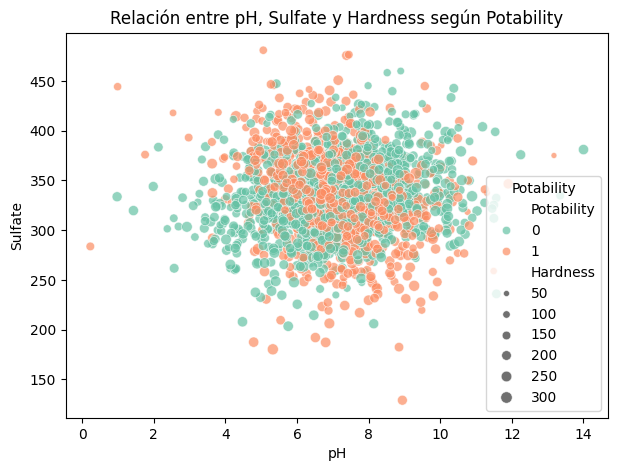

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='ph',
    y='Sulfate',
    hue='Potability',
    size='Hardness',
    palette='Set2',
    alpha=0.7
)
plt.title('Relación entre pH, Sulfate y Hardness según Potability')
plt.xlabel('pH')
plt.ylabel('Sulfate')
plt.legend(title='Potability')
plt.show()


El gráfico muestra la relación conjunta entre pH en el eje X, Sulfate en el eje Y y Hardness representado por el tamaño de los puntos. Los colores diferencian entre agua potable y no potable.

Las dos clases aparecen mezcladas y superpuestas, sin formar grupos distintos. Esto indica que, incluso combinando estas variables, no existe una separación visual clara entre agua potable y no potable.

Por lo tanto, la potabilidad no puede determinarse fácilmente mediante estas tres variables de forma visual y se requiere un enfoque más complejo, como modelos de machine learning que consideren todas las variables en conjunto para lograr una mejor clasificación.

## Tratamiento de valores faltantes

El dataset contiene valores faltantes principalmente en las variables `ph` y `Sulfate`. Para evitar eliminar filas completas y perder información, se decidió imputar los valores faltantes utilizando la mediana de cada columna numérica. La mediana es una medida robusta frente a valores extremos y permite completar el dataset de forma consistente antes del modelado.


In [ ]:
# Imputación de valores faltantes usando la mediana
df = df.fillna(df.median(numeric_only=True))

# Verificación después del relleno
df.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


## Conclusión del análisis exploratorio

El EDA no permitió separar claramente agua potable y no potable, por lo que será necesario avanzar al modelado para buscar patrones más profundos.

El análisis exploratorio mostró que las variables fisicoquímicas del agua no presentan una diferencia clara entre muestras potables y no potables cuando se analizan de forma individual. Las distribuciones, correlaciones, boxplots y el gráfico multivariado evidencian una alta superposición entre ambas clases, lo que sugiere que la potabilidad no depende de un único parámetro, sino de la combinación de múltiples factores.

También se identificaron valores faltantes en algunas columnas, que fueron completados mediante la mediana para mantener la integridad del dataset. Además, se observó un desbalance entre clases, con una mayor proporción de muestras de agua no potable.

En conjunto, estos resultados indican que la potabilidad no puede determinarse visualmente a partir de una sola variable y que, en etapas posteriores del proyecto, será necesario aplicar técnicas de modelado más avanzadas para evaluar si la combinación de todas las variables permite mejorar la capacidad de predicción.

